In [1]:
# Importing general libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Importing Scikit-Learn packages
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Regression Tasks

### Import Data ###

In [2]:
# Getting Data
data = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
data['PRICE']=load_boston().target

# data.info()

# print(load_boston().DESCR)
# Attribute Information (in order):
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

#Checking Correlation
# print(abs(data.corr()['PRICE']).sort_values(ascending=False))
# sns.pairplot(data)

X = data.drop('PRICE',axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Vanilla Linear Regression ###

In [3]:
from sklearn.linear_model import LinearRegression

t1 = time.time()
vanilla_LM = LinearRegression()
vanilla_LM.fit(X_train, y_train)
predict = vanilla_LM.predict(X_test)
t2 = time.time()
t = t2-t1

print('Mean Squared Error is: {}'.format(mean_squared_error(y_test,predict)))
print('Computaion Time: {} ms'.format(t*1000))

Mean Squared Error is: 24.29111947497371
Computaion Time: 2722.6219177246094 ms


### Linear Regression with Regularization ###

The Lasso (L1 regularization) is a linear model that estimates sparse coefficients. It effectively reduce the number of features upon which the given solution is dependent.

Ridge regression (L2 regularization) addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares

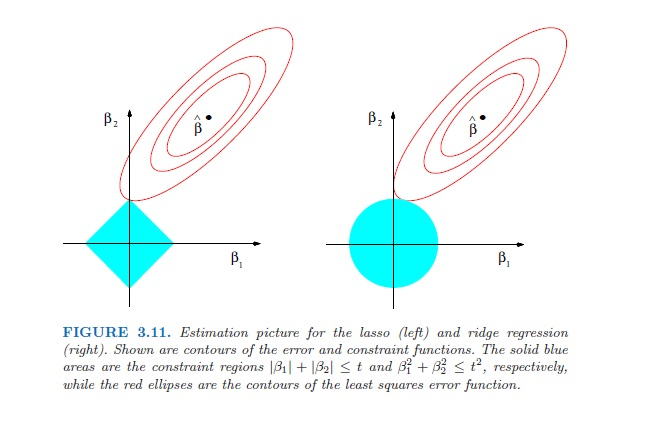

In [4]:
from sklearn.linear_model import Ridge,Lasso

t1 = time.time()
LM_L1 = Lasso()
LM_L1.fit(X_train, y_train)
predict_L1 = LM_L1.predict(X_test)
t2 = time.time()
t_L1 = t2-t1

LM_L2 = Ridge()
LM_L2.fit(X_train, y_train)
predict_L2 = LM_L2.predict(X_test)
t3 = time.time()
t_L2 = t3-t2

print('Mean Squared Error for Lasso is: {}'.format(mean_squared_error(y_test,predict_L1)))
print('Computaion Time for Lasso: {} ms'.format(t_L1*1000))
print('\n')
print('Mean Squared Error is for Ridge: {}'.format(mean_squared_error(y_test,predict_L2)))
print('Computaion Time for Ridge: {} ms'.format(t_L2*1000))

Mean Squared Error for Lasso is: 24.409489761299707
Computaion Time for Lasso: 3.9548873901367188 ms


Mean Squared Error is for Ridge: 24.477191227708634
Computaion Time for Ridge: 2.588987350463867 ms


In [5]:
# With Cross Validation to Find Best Alpha Value for Regularization

from sklearn.linear_model import RidgeCV,LassoCV

t1 = time.time()
LM_L1 = LassoCV()
LM_L1.fit(X_train, y_train)
predict_L1 = LM_L1.predict(X_test)
t2 = time.time()
t_L1 = t2-t1

LM_L2 = RidgeCV()
LM_L2.fit(X_train, y_train)
predict_L2 = LM_L2.predict(X_test)
t3 = time.time()
t_L2 = t3-t2

print('Mean Squared Error for LassoCV is: {}'.format(mean_squared_error(y_test,predict_L1)))
print('Computaion Time for LassoCV: {} ms'.format(t_L1*1000))
print('Best alpha for LassoCV is {}'.format(LM_L1.alpha_))
print('\n')
print('Mean Squared Error is for RidgeCV: {}'.format(mean_squared_error(y_test,predict_L2)))
print('Computaion Time for RidgeCV: {} ms'.format(t_L2*1000))
print('Best alpha for RidgeCV is {}'.format(LM_L2.alpha_))

Mean Squared Error for LassoCV is: 24.152986637780575
Computaion Time for LassoCV: 45.393943786621094 ms
Best alpha for LassoCV is 0.7112607795804332


Mean Squared Error is for RidgeCV: 24.301024996862452
Computaion Time for RidgeCV: 3.5550594329833984 ms
Best alpha for RidgeCV is 0.1


### Support Vector Machine Regressor ###

C is a hyperparameter related to regularization; using low C value the margin is quite large, while  using a high C value the classifier makes fewer margin violations but ends up with a smaller margin. If your SVM model is overfitting, you can try regularizing it by reducing C.

For polynomial kernel: degree is the highest allowable order, reduce degree when overfitting; coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

For polynomial and RBF kernel: γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it.

### Converging Problem ###

Normally when an optimization algorithm does not converge, it is usually because the problem is not well-conditioned, perhaps due to a poor scaling of the decision variables. There are a few things you can try.
    
Normalize your training data so that the problem hopefully becomes more well conditioned, which in turn can speed up convergence. One possibility is to scale your data to 0 mean, unit standard deviation using Scikit-Learn's StandardScaler for an example. Note that you have to apply the StandardScaler fitted on the training data to the test data.

Make sure the other arguments such as regularization weight, C, is set appropriately.

Set max_iter to a larger value. The default is 1000.

Set dual = True if number of features > number of examples and vice versa. This solves the SVM optimization problem using the dual formulation.

In [16]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# std_transform = StandardScaler()
# std_transform.fit(X_train)
# X_train = std_transform.transform(X_train)
# X_test = std_transform.transform(X_test)

t1 = time.time()
LM_1 = LinearSVR(max_iter=10000)
LM_1.fit(X_train, y_train)
predict_1 = LM_1.predict(X_test)
t2 = time.time()
t_1 = t2-t1

LM_2 = SVR(kernel='linear',)
LM_2.fit(X_train, y_train)
predict_2 = LM_2.predict(X_test)
t3 = time.time()
t_2 = t3-t2

print('Mean Squared Error for LinearSVR is: {}'.format(mean_squared_error(y_test,predict_1)))
print('Computaion Time for LinearSVR: {} ms'.format(t_1*1000))
print('\n')
print('Mean Squared Error is for SVR: {}'.format(mean_squared_error(y_test,predict_2)))
print('Computaion Time for SVR: {} ms'.format(t_2*1000))

Mean Squared Error for LinearSVR is: 30.027242672279165
Computaion Time for LinearSVR: 2.517223358154297 ms


Mean Squared Error is for SVR: 28.91852267161847
Computaion Time for SVR: 12.623071670532227 ms


### Decision Tree and Random Forest ###

In [9]:
from sklearn.tree import DecisionTreeRegressor

t1 = time.time()
Tree = DecisionTreeRegressor()
Tree.fit(X_train, y_train)
predict = Tree.predict(X_test)
t2 = time.time()
t = t2-t1

print('Mean Squared Error for Tree is: {}'.format(mean_squared_error(y_test,predict)))
print('Computaion Time for Tree: {} ms'.format(t*1000))

Mean Squared Error for Tree is: 10.95343137254902
Computaion Time for Tree: 3.337860107421875 ms


In [10]:
from sklearn.ensemble import RandomForestRegressor


t1 = time.time()
Forest = RandomForestRegressor()
Forest.fit(X_train, y_train)
predict = Forest.predict(X_test)
t2 = time.time()
t = t2-t1

print('Mean Squared Error for RandomForest is: {}'.format(mean_squared_error(y_test,predict)))
print('Computaion Time for RandomForest: {} ms'.format(t*1000))

Mean Squared Error for RandomForest is: 8.766884264705881
Computaion Time for RandomForest: 222.76926040649414 ms


In [11]:
from sklearn.ensemble import ExtraTreesRegressor

t1 = time.time()
Forest = ExtraTreesRegressor()
Forest.fit(X_train, y_train)
predict = Forest.predict(X_test)
t2 = time.time()
t = t2-t1

print('Mean Squared Error for ExtraTree is: {}'.format(mean_squared_error(y_test,predict)))
print('Computaion Time for ExtraTree: {} ms'.format(t*1000))

Mean Squared Error for ExtraTree is: 10.423639666666656
Computaion Time for ExtraTree: 149.66607093811035 ms


### K-Nearest Neighbors###

In [12]:
from sklearn.neighbors import KNeighborsRegressor

# std_transform = StandardScaler()
# std_transform.fit(X_train)
# X_train = std_transform.transform(X_train)
# X_test = std_transform.transform(X_test)

t1 = time.time()
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
predict = KNN.predict(X_test)
t2 = time.time()
t = t2-t1

print('Mean Squared Error for KNN is: {}'.format(mean_squared_error(y_test,predict)))
print('Computaion Time for KNN: {} ms'.format(t*1000))

Mean Squared Error for KNN is: 20.60552941176471
Computaion Time for KNN: 2.3071765899658203 ms


### Hyperparameter Tuning: Grid Search vs. Random Search ###

In [19]:
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr.fit(X_train,y_train)
predict_svr = svr.predict(X_test)

parameters = {'kernel':['linear', 'rbf','poly'], 'C':[0.1,1, 10,100],'degree':[3,4,5]}
svr_Grid = GridSearchCV(svr, parameters,refit=True)
search = svr_Grid.fit(X_train,y_train)
predict_search = svr_Grid.predict(X_test)

print('Mean Squared Error for SVR_default is: {}'.format(mean_squared_error(y_test,predict_svr)))
print('\n')
print('Best Parameter Found: {}'.format(search.best_params_))
print('Mean Squared Error for SVR_default is: {}'.format(mean_squared_error(y_test,predict_search)))





Mean Squared Error for SVR_default is: 25.668539678396044


Best Parameter Found: {'C': 100, 'degree': 3, 'kernel': 'rbf'}
Mean Squared Error for SVR_default is: 11.887633091912553


In [23]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'kernel':['linear', 'rbf','poly'], 'C':np.arange(1,100,5),'degree':[3,4,5]}
svr_Rand = RandomizedSearchCV(svr, parameters,refit=True)
search = svr_Rand.fit(X_train,y_train)
predict_search = svr_Rand.predict(X_test)

print('Best Parameter Found: {}'.format(search.best_params_))
print('Mean Squared Error for SVR_default is: {}'.format(mean_squared_error(y_test,predict_search)))



Best Parameter Found: {'kernel': 'rbf', 'degree': 5, 'C': 11}
Mean Squared Error for SVR_default is: 12.56691088597057


### Neural Network ###

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ModelCheckpoint

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

NN_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2) #, callbacks=callbacks_list)
predict = NN_model.predict(X_test)

print('Mean Squared Error for NN is: {}'.format(mean_squared_error(y_test,predict)))



Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
11/11 [==============================] - 0s 9ms/step - loss: 22.1995 - mean_absolute_error: 22.1995 -

Epoch 45/500
11/11 [==============================] - 0s 3ms/step - loss: 2.2114 - mean_absolute_error: 2.2114 - val_loss: 2.4809 - val_mean_absolute_error: 2.4809
Epoch 46/500
11/11 [==============================] - 0s 3ms/step - loss: 2.2413 - mean_absolute_error: 2.2413 - val_loss: 2.3076 - val_mean_absolute_error: 2.3076
Epoch 47/500
11/11 [==============================] - 0s 3ms/step - loss: 1.9669 - mean_absolute_error: 1.9669 - val_loss: 2.2940 - val_mean_absolute_error: 2.2940
Epoch 48/500
11/11 [==============================] - 0s 4ms/step - loss: 2.0750 - mean_absolute_error: 2.0750 - val_loss: 2.4418 - val_mean_absolute_error: 2.4418
Epoch 49/500
11/11 [==============================] - 0s 3ms/step - loss: 2.2673 - mean_absolute_error: 2.2673 - val_loss: 2.3656 - val_mean_absolute_error: 2.3656
Epoch 50/500
11/11 [==============================] - 0s 3ms/step - loss: 2.1064 - mean_absolute_error: 2.1064 - val_loss: 2.3493 - val_mean_absolute_error: 2.3493
Epoch 51/500
11/

Epoch 144/500
11/11 [==============================] - 0s 3ms/step - loss: 1.2292 - mean_absolute_error: 1.2292 - val_loss: 2.2959 - val_mean_absolute_error: 2.2959
Epoch 145/500
11/11 [==============================] - 0s 3ms/step - loss: 1.0492 - mean_absolute_error: 1.0492 - val_loss: 2.6316 - val_mean_absolute_error: 2.6316
Epoch 146/500
11/11 [==============================] - 0s 3ms/step - loss: 1.4344 - mean_absolute_error: 1.4344 - val_loss: 2.6163 - val_mean_absolute_error: 2.6163
Epoch 147/500
11/11 [==============================] - 0s 5ms/step - loss: 1.4270 - mean_absolute_error: 1.4270 - val_loss: 2.1880 - val_mean_absolute_error: 2.1880
Epoch 148/500
11/11 [==============================] - 0s 6ms/step - loss: 1.2006 - mean_absolute_error: 1.2006 - val_loss: 2.4468 - val_mean_absolute_error: 2.4468
Epoch 149/500
11/11 [==============================] - 0s 5ms/step - loss: 1.1277 - mean_absolute_error: 1.1277 - val_loss: 2.3722 - val_mean_absolute_error: 2.3722
Epoch 150/

Epoch 194/500
11/11 [==============================] - 0s 3ms/step - loss: 1.0413 - mean_absolute_error: 1.0413 - val_loss: 2.0988 - val_mean_absolute_error: 2.0988
Epoch 195/500
11/11 [==============================] - 0s 3ms/step - loss: 1.1573 - mean_absolute_error: 1.1573 - val_loss: 2.2245 - val_mean_absolute_error: 2.2245
Epoch 196/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8767 - mean_absolute_error: 0.8767 - val_loss: 2.3094 - val_mean_absolute_error: 2.3094
Epoch 197/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9197 - mean_absolute_error: 0.9197 - val_loss: 2.2574 - val_mean_absolute_error: 2.2574
Epoch 198/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8990 - mean_absolute_error: 0.8990 - val_loss: 2.2535 - val_mean_absolute_error: 2.2535
Epoch 199/500
11/11 [==============================] - 0s 3ms/step - loss: 1.0132 - mean_absolute_error: 1.0132 - val_loss: 2.2128 - val_mean_absolute_error: 2.2128
Epoch 200/

Epoch 244/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7281 - mean_absolute_error: 0.7281 - val_loss: 2.1943 - val_mean_absolute_error: 2.1943
Epoch 245/500
11/11 [==============================] - 0s 3ms/step - loss: 1.1218 - mean_absolute_error: 1.1218 - val_loss: 2.2739 - val_mean_absolute_error: 2.2739
Epoch 246/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8850 - mean_absolute_error: 0.8850 - val_loss: 2.1280 - val_mean_absolute_error: 2.1280
Epoch 247/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9243 - mean_absolute_error: 0.9243 - val_loss: 2.3019 - val_mean_absolute_error: 2.3019
Epoch 248/500
11/11 [==============================] - 0s 4ms/step - loss: 0.8893 - mean_absolute_error: 0.8893 - val_loss: 2.2231 - val_mean_absolute_error: 2.2231
Epoch 249/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9134 - mean_absolute_error: 0.9134 - val_loss: 2.3880 - val_mean_absolute_error: 2.3880
Epoch 250/

Epoch 294/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9153 - mean_absolute_error: 0.9153 - val_loss: 2.5598 - val_mean_absolute_error: 2.5598
Epoch 295/500
11/11 [==============================] - 0s 4ms/step - loss: 1.0184 - mean_absolute_error: 1.0184 - val_loss: 2.3528 - val_mean_absolute_error: 2.3528
Epoch 296/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7752 - mean_absolute_error: 0.7752 - val_loss: 2.3532 - val_mean_absolute_error: 2.3532
Epoch 297/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8966 - mean_absolute_error: 0.8966 - val_loss: 2.4714 - val_mean_absolute_error: 2.4714
Epoch 298/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8246 - mean_absolute_error: 0.8246 - val_loss: 2.2127 - val_mean_absolute_error: 2.2127
Epoch 299/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8864 - mean_absolute_error: 0.8864 - val_loss: 2.2617 - val_mean_absolute_error: 2.2617
Epoch 300/

Epoch 344/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9329 - mean_absolute_error: 0.9329 - val_loss: 2.0335 - val_mean_absolute_error: 2.0335
Epoch 345/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7397 - mean_absolute_error: 0.7397 - val_loss: 2.1711 - val_mean_absolute_error: 2.1711
Epoch 346/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - val_loss: 2.0440 - val_mean_absolute_error: 2.0440
Epoch 347/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6660 - mean_absolute_error: 0.6660 - val_loss: 2.1316 - val_mean_absolute_error: 2.1316
Epoch 348/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6067 - mean_absolute_error: 0.6067 - val_loss: 2.1647 - val_mean_absolute_error: 2.1647
Epoch 349/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6990 - mean_absolute_error: 0.6990 - val_loss: 2.1730 - val_mean_absolute_error: 2.1730
Epoch 350/

Epoch 394/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8585 - mean_absolute_error: 0.8585 - val_loss: 2.2052 - val_mean_absolute_error: 2.2052
Epoch 395/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9840 - mean_absolute_error: 0.9840 - val_loss: 2.5873 - val_mean_absolute_error: 2.5873
Epoch 396/500
11/11 [==============================] - 0s 3ms/step - loss: 1.1121 - mean_absolute_error: 1.1121 - val_loss: 2.2318 - val_mean_absolute_error: 2.2318
Epoch 397/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9550 - mean_absolute_error: 0.9550 - val_loss: 2.1935 - val_mean_absolute_error: 2.1935
Epoch 398/500
11/11 [==============================] - 0s 3ms/step - loss: 0.8208 - mean_absolute_error: 0.8208 - val_loss: 2.0678 - val_mean_absolute_error: 2.0678
Epoch 399/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5890 - mean_absolute_error: 0.5890 - val_loss: 2.0947 - val_mean_absolute_error: 2.0947
Epoch 400/

Epoch 444/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6548 - mean_absolute_error: 0.6548 - val_loss: 2.0663 - val_mean_absolute_error: 2.0663
Epoch 445/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6570 - mean_absolute_error: 0.6570 - val_loss: 2.3446 - val_mean_absolute_error: 2.3446
Epoch 446/500
11/11 [==============================] - 0s 3ms/step - loss: 1.2143 - mean_absolute_error: 1.2143 - val_loss: 2.4182 - val_mean_absolute_error: 2.4182
Epoch 447/500
11/11 [==============================] - 0s 4ms/step - loss: 0.9092 - mean_absolute_error: 0.9092 - val_loss: 2.0393 - val_mean_absolute_error: 2.0393
Epoch 448/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7495 - mean_absolute_error: 0.7495 - val_loss: 2.0950 - val_mean_absolute_error: 2.0950
Epoch 449/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7857 - mean_absolute_error: 0.7857 - val_loss: 2.0304 - val_mean_absolute_error: 2.0304
Epoch 450/

Epoch 494/500
11/11 [==============================] - 0s 4ms/step - loss: 0.5103 - mean_absolute_error: 0.5103 - val_loss: 2.0752 - val_mean_absolute_error: 2.0752
Epoch 495/500
11/11 [==============================] - 0s 4ms/step - loss: 0.4168 - mean_absolute_error: 0.4168 - val_loss: 2.0465 - val_mean_absolute_error: 2.0465
Epoch 496/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - val_loss: 2.0494 - val_mean_absolute_error: 2.0494
Epoch 497/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - val_loss: 2.1790 - val_mean_absolute_error: 2.1790
Epoch 498/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5896 - mean_absolute_error: 0.5896 - val_loss: 2.1699 - val_mean_absolute_error: 2.1699
Epoch 499/500
11/11 [==============================] - 0s 3ms/step - loss: 0.5349 - mean_absolute_error: 0.5349 - val_loss: 2.1478 - val_mean_absolute_error: 2.1478
Epoch 500/

# Classification Task

# Data Preparation #

### Imputing###

In [97]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = pd.DataFrame([[np.nan, 2, 2], [6, np.nan, 4], [7, 6, np.nan], [np.nan, 8, np.nan]])

imp.fit(X_imp)
print(imp.transform(X_imp))
print('\n')


#Using apply function for transfering data

def impfunc(x,avg):
    if np.isnan(x):
        return avg
    else:
        return x
print(X_imp[1].apply(lambda x: impfunc(x,X_imp.mean(axis=0)[1])))


[[6.5        2.         2.        ]
 [6.         5.33333333 4.        ]
 [7.         6.         3.        ]
 [6.5        8.         3.        ]]


0    2.000000
1    5.333333
2    6.000000
3    8.000000
Name: 1, dtype: float64


### Encoding ###